In [5]:
import os
import sys

In [6]:
os.getcwd()

'/home/jovyan/work/ETF'

In [7]:
package_path = '/home/jovyan/work/k_chart'
if package_path not in sys.path:
    sys.path.append(package_path)

In [8]:
import numpy as np
import pandas as pd

from KChart import k_chart
from Algorithm.twinety import bi
from Algorithm.swt import swt, ts_swt
from Algorithm.mkstatus import trend, strong

<Figure size 432x288 with 0 Axes>

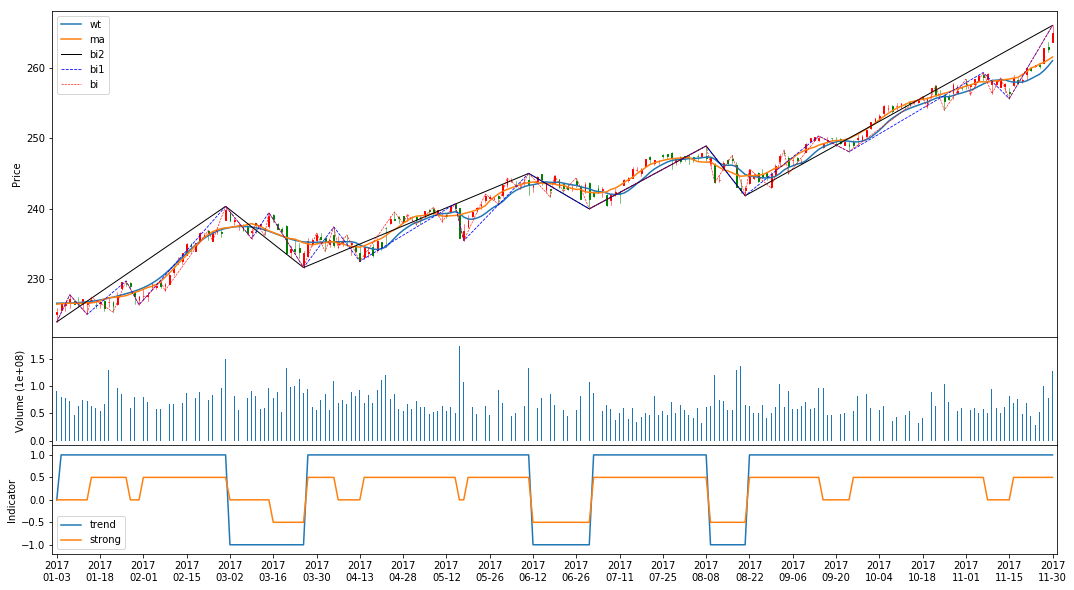

In [15]:
# Load data
source_data = pd.read_csv('spy.csv', parse_dates=True, index_col=0)

# Calc
n=256
df=source_data #[3:n]
# bi
df['bi'] = bi(df['High'],df['Low'])
# Calc Bench (Wavelet)
cA, cD = swt(df['Close'],6)
df['wt']=cA[1]
df['bi1'] = bi(df['High'],df['Low'],bench=cA[1])
df['bi2'] = bi(df['High'],df['Low'],bench=cA[2])
# calc main_indicator
cA, cD = ts_swt(df['Close'],6)
df['wt']=cA[2]
# calc main_indicator
df['ma'] = df['Close'].rolling(12,center=True,min_periods=1).mean()
# calc sub_indicator
df['trend'] = trend(df['bi2'])
df['strong'] = strong(df['bi1'],df['trend'])

# plot ohlc candlestick
df.k_chart(
        main_indicator_cols=['wt','ma'],
        volume_col=['Volume'], 
        sub_indicator_cols=['trend','strong'], 
        bi_cols=['bi2','bi1','bi']
        )